In [29]:
import pandas as pd
total_data=pd.read_csv('D:\\student\\final_combined_dataset.csv')
total_columns=list(total_data.columns)
maths_columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x', 'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x', 'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x', 'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x', 'G1.x', 'G2.x', 'G3.x']
portugese_columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet','guardian.y', 'traveltime.y', 'studytime.y', 'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y', 'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y', 'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']
maths_dataset=total_data[maths_columns]
portugese_dataset=total_data[portugese_columns]
print(maths_dataset.shape)
print(portugese_dataset.shape)


(882, 33)
(882, 33)


**Maths  and Portuguese G1 marks prediction**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error,r2_score
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
def predict_g1_marks(model,dataframe):#takes any regression model object and a dataframe returns actual and predicted marks
    data_cols=list(dataframe.columns)
    feature_data=dataframe[data_cols[:-3]]
    label_data=dataframe[data_cols[-3]]
    train_data,test_data,train_marks,test_marks=train_test_split(feature_data,label_data,test_size=0.25,random_state=0)
    model.fit(train_data,train_marks)
    results=model.predict(test_data)
    return test_marks,results
lnr=LinearRegression()
dr=DecisionTreeRegressor(random_state=0)
sv=LinearSVR(random_state=0,max_iter=100000)
k=KNeighborsRegressor()
models={'linear_regression':lnr,'decision_tree':dr,'linear_svr':sv,'knn':k}
for key,value in models.items():#pass one model at a time to the predict_g1 marks function and gather the actual and predicted marks
    results=predict_g1_marks(value,maths_dataset)
    mae=round(mean_absolute_error(results[0],results[1]),3)
    #mean absolute error=1/n*sum(abs(y-yhat))-> it tells us about the average residual obtained from a model
    #lesser the mae better the model
    #r2 score tells us about how good the model is .Best model will have score of 1.0 .random model ->0.0
    rt=round(r2_score(results[0],results[1]),3)
    print('mae and r2 score by %r on maths data(g1) are %r,%r' % (key,mae,rt))
    if key=='decision_tree':
        print(value.get_depth())
print('*******************************************')
for key,value in models.items():#portugese dataset
    results=predict_g1_marks(value,portugese_dataset)
    mae=round(mean_absolute_error(results[0],results[1]),3)
    rt=round(r2_score(results[0],results[1]),3)
    print('mae and r2 score by %r on portugese data(g1) are %r,%r' % (key,mae,rt))
    if key=='decision_tree':
        print(value.get_depth())

    
    

mae and r2 score by 'linear_regression' on maths data(g1) are 1.483,0.327
mae and r2 score by 'decision_tree' on maths data(g1) are 2.045,-0.364
17
mae and r2 score by 'linear_svr' on maths data(g1) are 1.345,0.294
mae and r2 score by 'knn' on maths data(g1) are 1.855,0.043
*******************************************
mae and r2 score by 'linear_regression' on portugese data(g1) are 0.992,0.376
mae and r2 score by 'decision_tree' on portugese data(g1) are 1.602,-0.13
21
mae and r2 score by 'linear_svr' on portugese data(g1) are 0.989,0.39
mae and r2 score by 'knn' on portugese data(g1) are 1.524,0.002


**Maths and Portuguese G3 marks**

In [31]:
"""The predict_g3 marks is similar to predict_g1 in terms of functionality except that the label or marks that would be considered
are that of G3 examination"""
def predict_g3_marks(model,dataframe):
    data_cols=list(dataframe.columns)
    feature_data=dataframe[data_cols[:-3]]
    label_data=dataframe[data_cols[-1]]
    train_data,test_data,train_marks,test_marks=train_test_split(feature_data,label_data,test_size=0.25,random_state=0)
    model.fit(train_data,train_marks)
    results=model.predict(test_data)
    return test_marks,results
for key,value in models.items():
    results=predict_g3_marks(value,maths_dataset)
    mae=round(mean_absolute_error(results[0],results[1]),3)
    rt=round(r2_score(results[0],results[1]),3)
    print('mae and r2 score for %r on maths data(g3) are %r,%r' % (key,mae,rt))
    if key=='decision_tree':
        print(value.get_depth())
print('*******************************************')
for key,value in models.items():
    results=predict_g3_marks(value,portugese_dataset)
    mae=round(mean_absolute_error(results[0],results[1]),3)
    rt=round(r2_score(results[0],results[1]),3)
    print('mae and r2 score for %r on portugese data(g3) are %r,%r' % (key,mae,rt))
    if key=='decision_tree':
        print(value.get_depth())


mae and r2 score for 'linear_regression' on maths data(g3) are 1.965,0.296
mae and r2 score for 'decision_tree' on maths data(g3) are 2.068,0.154
17
mae and r2 score for 'linear_svr' on maths data(g3) are 1.768,0.218
mae and r2 score for 'knn' on maths data(g3) are 2.374,0.148
*******************************************
mae and r2 score for 'linear_regression' on portugese data(g3) are 1.027,0.477
mae and r2 score for 'decision_tree' on portugese data(g3) are 1.855,-0.325
20
mae and r2 score for 'linear_svr' on portugese data(g3) are 1.025,0.486
mae and r2 score for 'knn' on portugese data(g3) are 1.702,-0.082


*The following cell contains the column names corresponding to the demographic features for both maths and portugese subjects*

In [32]:
maths_demo_cols=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x', 'famsup.x', 'famrel.x', 'G1.x', 'G2.x', 'G3.x']
portug_demo_cols=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.y', 'famsup.y', 'famrel.y', 'G1.y', 'G2.y', 'G3.y']
maths_demographic_data=maths_dataset[maths_demo_cols]
portug_demographic_data=portugese_dataset[portug_demo_cols]
print(maths_demographic_data.shape)
print(portug_demographic_data.shape)

(882, 19)
(882, 19)


**Maths and Portugese subjects G1 marks using only demographic features only**

In [33]:
#evaluating the demographic features in predicting G1 marks by using same set of models which have been used earlier in the notebook
for key,value in models.items():
    results=predict_g1_marks(value,maths_demographic_data)
    mae=round(mean_absolute_error(results[0],results[1]),3)
    rt=round(r2_score(results[0],results[1]),3)
    print('mae and r2 score by %r on maths  demographic data(g1) are %r,%r' % (key,mae,rt))
    if key=='decision_tree':
        print(value.get_depth())
print('*******************************************')
for key,value in models.items():
    results=predict_g1_marks(value,portug_demographic_data)
    mae=round(mean_absolute_error(results[0],results[1]),3)
    rt=round(r2_score(results[0],results[1]),3)
    print('mae and r2 score by %r on portugese demographic data(g1) are %r,%r' % (key,mae,rt))
    if key=='decision_tree':
        print(value.get_depth())

mae and r2 score by 'linear_regression' on maths  demographic data(g1) are 1.945,0.03
mae and r2 score by 'decision_tree' on maths  demographic data(g1) are 2.471,-0.799
21
mae and r2 score by 'linear_svr' on maths  demographic data(g1) are 1.921,-0.037
mae and r2 score by 'knn' on maths  demographic data(g1) are 2.063,-0.065
*******************************************
mae and r2 score by 'linear_regression' on portugese demographic data(g1) are 1.301,0.167
mae and r2 score by 'decision_tree' on portugese demographic data(g1) are 1.833,-0.396
18
mae and r2 score by 'linear_svr' on portugese demographic data(g1) are 1.344,0.136
mae and r2 score by 'knn' on portugese demographic data(g1) are 1.404,0.108


**Maths and Portuguese subject G3 marks using demographic features only**

In [34]:
#demographic features in predicting G3 
for key,value in models.items():
    results=predict_g3_marks(value,maths_demographic_data)
    mae=round(mean_absolute_error(results[0],results[1]),3)
    rt=round(r2_score(results[0],results[1]),3)
    print('mae and r2 score by %r on maths  demographic data(g3) are %r,%r' % (key,mae,rt))
    if key=='decision_tree':
        print(value.get_depth())
print('*******************************************')
for key,value in models.items():
    results=predict_g3_marks(value,portug_demographic_data)
    mae=round(mean_absolute_error(results[0],results[1]),3)
    rt=round(r2_score(results[0],results[1]),3)
    print('mae and r2 score by %r on portugese demographic data(g3) are %r,%r' % (key,mae,rt))
    if key=='decision_tree':
        print(value.get_depth())

mae and r2 score by 'linear_regression' on maths  demographic data(g3) are 2.487,0.052
mae and r2 score by 'decision_tree' on maths  demographic data(g3) are 3.339,-0.814
18
mae and r2 score by 'linear_svr' on maths  demographic data(g3) are 2.428,-0.06
mae and r2 score by 'knn' on maths  demographic data(g3) are 2.662,-0.072
*******************************************
mae and r2 score by 'linear_regression' on portugese demographic data(g3) are 1.392,0.197
mae and r2 score by 'decision_tree' on portugese demographic data(g3) are 2.339,-1.545
19
mae and r2 score by 'linear_svr' on portugese demographic data(g3) are 1.409,0.166
mae and r2 score by 'knn' on portugese demographic data(g3) are 1.581,0.036


**Pearson Correlation for Maths dataset**

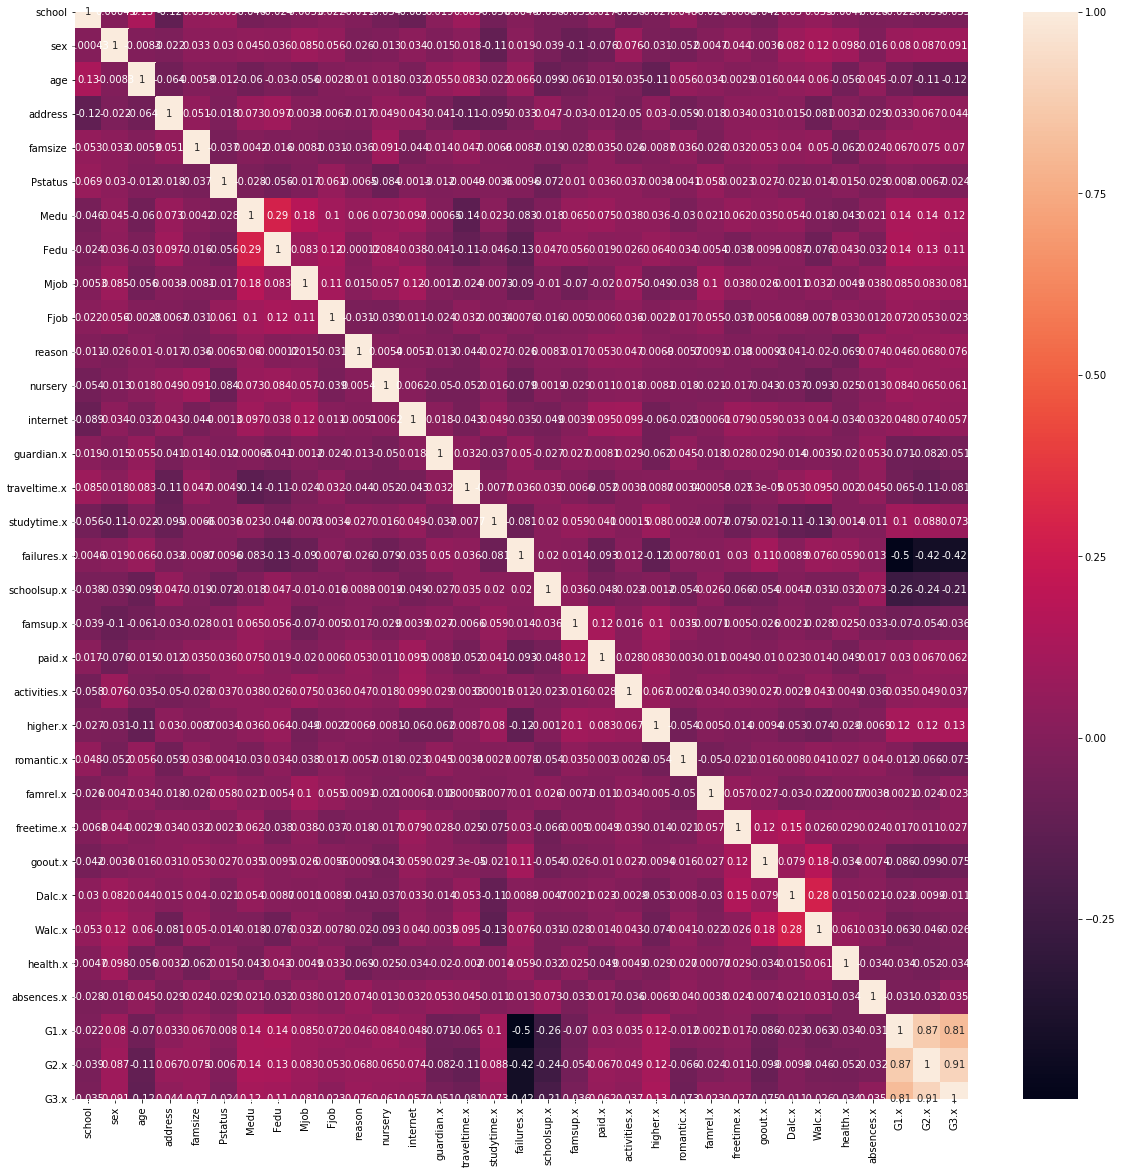

In [35]:
maths_corr=maths_dataset.corr()#correlation between all columns of the dataset
#correlation used is pearson correlation coefficient
#g1_correlations=abs(maths_corr['G1.x']).sort_values(ascending=False)
#g3_correlations=abs(maths_corr['G3.x']).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(maths_corr,annot=True)
plt.savefig('reg_correlation.png')
plt.show()



* Pearson correlation between few important features *

In [36]:
maths_corr[['Medu','Fedu','studytime.x','failures.x','schoolsup.x','higher.x','G1.x','G3.x']]

,Medu,Fedu,studytime.x,failures.x,schoolsup.x,higher.x,G1.x,G3.x
school,-0.046139,-0.024114,-0.056409,0.004604,-0.038259,-0.027063,-0.021909,-0.034894
sex,0.044649,0.035522,-0.114716,0.018579,-0.039032,-0.030502,0.080432,0.091032
age,-0.059781,-0.029652,-0.021901,0.066298,-0.099021,-0.110157,-0.070323,-0.119805
address,0.073045,0.097260,-0.094975,-0.032792,0.046902,0.030299,0.033290,0.044193
famsize,0.004164,-0.016109,-0.006562,-0.008655,-0.019332,-0.008742,0.066611,0.069962
Pstatus,-0.028433,-0.055554,-0.003645,-0.009592,-0.072158,0.003408,0.008031,-0.023633
Medu,1.000000,0.288694,0.022512,-0.082601,-0.018110,0.035933,0.136248,0.119566
Fedu,0.288694,1.000000,-0.045879,-0.132904,0.047126,0.064363,0.141413,0.108043
Mjob,0.175341,0.083279,-0.007315,-0.090078,-0.010402,-0.049114,0.084560,0.080525
Fjob,0.101691,0.122999,-0.003447,0.007600,-0.015935,-0.002245,0.071571,0.023292


**Predicting G1 and G3 mars for Maths subject using six most important features**

In [37]:
#the features which have a correlation of 0.1 or greater with G1 ,g3 are selected 
#this code does same procedure as used above in predicting G1 ,G3 using same set of models except with less number of features
new_feature_columns=['Medu','Fedu','studytime.x','failures.x','schoolsup.x','higher.x']
new_feature_data=maths_dataset[new_feature_columns]
g1_label_data=maths_dataset['G1.x']
g3_label_data=maths_dataset['G3.x']
labels=[g1_label_data,g3_label_data]
def predict_scores(feature_data,label_data,model):
    train_data,test_data,train_label,test_label=train_test_split(feature_data,label_data,test_size=0.25,random_state=0)
    model.fit(train_data,train_label)
    preds=model.predict(test_data)
    return test_label,preds
for lab in labels:
    for key,value in models.items():
        results=predict_scores(new_feature_data,lab,value)
        mae=round(mean_absolute_error(results[0],results[1]),3)
        rt=round(r2_score(results[0],results[1]),3)
        print('mae and r2 score by %r on maths data(updated features) are %r,%r' % (key,mae,rt))
        if key=='decision_tree':
            print(value.get_depth())
    print('*************************************')

mae and r2 score by 'linear_regression' on maths data(updated features) are 1.427,0.315
mae and r2 score by 'decision_tree' on maths data(updated features) are 1.474,0.201
11
mae and r2 score by 'linear_svr' on maths data(updated features) are 1.33,0.291
mae and r2 score by 'knn' on maths data(updated features) are 1.548,0.199
*************************************
mae and r2 score by 'linear_regression' on maths data(updated features) are 1.926,0.267
mae and r2 score by 'decision_tree' on maths data(updated features) are 1.994,0.103
12
mae and r2 score by 'linear_svr' on maths data(updated features) are 1.759,0.216
mae and r2 score by 'knn' on maths data(updated features) are 2.063,0.182
*************************************


**Portuguese dataset pearson correlation**

In [38]:
portugese_corr=portugese_dataset.corr()#pearson correlation on portugese dataset
portugese_corr[['G1.y','G3.y','school','sex','address']]

,G1.y,G3.y,school,sex,address
school,-0.195989,-0.225608,1.000000,0.000431,-0.118739
sex,-0.202177,-0.219950,0.000431,1.000000,-0.021700
age,-0.061821,0.033710,0.128319,-0.008319,-0.064422
address,0.163939,0.185220,-0.118739,-0.021700,1.000000
famsize,0.129746,0.049980,0.052931,0.032865,0.050739
Pstatus,-0.014384,-0.117842,0.069313,0.029700,-0.018269
Medu,0.183532,0.155046,-0.046139,0.044649,0.073045
Fedu,0.108300,0.147093,-0.024114,0.035522,0.097260
Mjob,0.030968,0.004661,-0.005330,0.084891,0.003339
Fjob,0.043031,-0.018844,0.022384,0.055557,-0.006673


**Predicting G1 and G3 marks of portuguese subject using some important features based on correlation**

In [39]:
#features which have 0.1 or greater correlation with G1 ,G3
new_por_feature_cols=['school', 'sex', 'address','Pstatus', 'famsize','Medu', 'Fedu','Mjob','Fjob', 'guardian.y','traveltime.y','studytime.y', 'failures.y', 'schoolsup.y', 'paid.y', 'activities.y', 'higher.y', 'goout.y', 'Dalc.y', 'Walc.y', 'health.y', 'absences.y']
por_g1_labels=portugese_dataset['G1.y']
por_g3_labels=portugese_dataset['G3.y']
por_labels=[por_g1_labels,por_g3_labels]
por_feature_data=portugese_dataset[new_por_feature_cols]
for lab in por_labels:
    for key,value in models.items():
        results=predict_scores(por_feature_data,lab,value)
        mae=round(mean_absolute_error(results[0],results[1]),3)
        rt=round(r2_score(results[0],results[1]),3)
        print('mae and r2 score by %r on portugese data(updated features) are %r,%r' % (key,mae,rt))
        if key=='decision_tree':
            print(value.get_depth())
    print('*************************************')

mae and r2 score by 'linear_regression' on portugese data(updated features) are 0.999,0.376
mae and r2 score by 'decision_tree' on portugese data(updated features) are 1.633,-0.161
26
mae and r2 score by 'linear_svr' on portugese data(updated features) are 0.995,0.388
mae and r2 score by 'knn' on portugese data(updated features) are 1.504,0.017
*************************************
mae and r2 score by 'linear_regression' on portugese data(updated features) are 1.081,0.461
mae and r2 score by 'decision_tree' on portugese data(updated features) are 1.928,-0.424
20
mae and r2 score by 'linear_svr' on portugese data(updated features) are 1.127,0.445
mae and r2 score by 'knn' on portugese data(updated features) are 1.71,-0.135
*************************************


**Using K-fold cross validation in predicting marks**

In [40]:
#testing whether a cross-validation using kfold would give a better result than train test split on maths dataset
from sklearn.model_selection import KFold
def predict_scores_folds(feature_data,label,model):
    #predict the class labels for each of the three grades for a given model
    trial_cv=KFold(n_splits=5,shuffle=True)
    mae_scores=[]
    r2_scores=[]
    for train_num,test_num in trial_cv.split(X=feature_data,y=label):#gives the train,test indices for each split
        train_indexes=list(train_num)#convert the indices to list
        test_indexes=list(test_num)
        train_features=feature_data.loc[train_indexes,:]#get all rows at specified positions
        test_features=feature_data.loc[test_indexes,:]
        train_labels=label.loc[train_indexes]
        test_labels=label.loc[test_indexes]
        model.fit(train_features,train_labels)
        preds=model.predict(test_features)
        ma=mean_absolute_error(test_labels,preds)
        r=r2_score(test_labels,preds)
        mae_scores.append(ma)
        r2_scores.append(r)
    print('average mae score with 5 folds marks is %r '% (sum(mae_scores)/len(mae_scores)))
    print('average r2 score with 5 folds marks is %r '% (sum(r2_scores)/len(r2_scores)))
    print('***********************************************************')
    return     
for lab in labels:
    for key,value in models.items():
        print(key)
        predict_scores_folds(new_feature_data,lab,value)
        if key=='decision_tree':
            print(value.get_depth())
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')

linear_regression
average mae score with 5 folds marks is 1.3653596106406485 
average r2 score with 5 folds marks is 0.3191104344540882 
***********************************************************
decision_tree
average mae score with 5 folds marks is 1.4576967716195588 
average r2 score with 5 folds marks is 0.17330189881674346 
***********************************************************
11
linear_svr
average mae score with 5 folds marks is 1.2733974375922799 
average r2 score with 5 folds marks is 0.3014157016458879 
***********************************************************
knn
average mae score with 5 folds marks is 1.604678993323061 
average r2 score with 5 folds marks is 0.15378575762510305 
***********************************************************
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
linear_regression
average mae score with 5 folds marks is 1.8894619406394746 
average r2 score with 5 folds marks is 0.2217776286602658 
************************************************

**Tuning linear svr model  using grid search cv on maths dataset for predicting G1 and G3 marks**

In [41]:
#tuning the linear svr for maths dataset (g1 and g3) with important features
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
svr=LinearSVR(random_state=0,max_iter=100000)
tune_parameters={'C':[0.005,0.001,0.05,0.01,0.1,0.5,1,1.5],'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'],'fit_intercept':[True,False],'intercept_scaling':[0.1,0.3,0.5,0.7,0.9,1]}
def tune_model(model,parameters,metric,features,labels):
    marks_labels=['G1','G3']
    a=0
    tuned_results={}
    for lab in labels:
        print('for %r ' % marks_labels[a])
        gscv=GridSearchCV(estimator=svr,param_grid=parameters,scoring=metric,cv=9,return_train_score=True)
        gscv.fit(new_feature_data,lab)
        df=pd.DataFrame(gscv.cv_results_)
        tuned_results[marks_labels[a]]=df
        print('The best parameters for predicting %r  are %r ' % (marks_labels[a],gscv.best_params_))
        print('The best r2 score  for predicting %r  is %r ' % (marks_labels[a],gscv.best_score_))
        print('The best model  for predicting %r  is  ' % marks_labels[a])
        print(gscv.best_estimator_)
        a+=1
        print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    return tuned_results
#for maths 
print('maths subject ')
tuned_results_maths=tune_model(svr,tune_parameters,'r2',new_feature_data,labels)
print('end...............')



maths subject 
for 'G1' 
The best parameters for predicting 'G1'  are {'C': 1.5, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_epsilon_insensitive'} 
The best r2 score  for predicting 'G1'  is 0.47188115698494987 
The best model  for predicting 'G1'  is  
LinearSVR(C=1.5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1, loss='squared_epsilon_insensitive',
          max_iter=100000, random_state=0, tol=0.0001, verbose=0)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
for 'G3' 
The best parameters for predicting 'G3'  are {'C': 1.5, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'epsilon_insensitive'} 
The best r2 score  for predicting 'G3'  is 0.384903594322702 
The best model  for predicting 'G3'  is  
LinearSVR(C=1.5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1, loss='epsilon_insensitive', max_iter=100000,
          random_state=0, tol=0.0001, verbose=0)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

**Tuning linear svr for predicting G1 and G3 marks of portuguese subject using gridsearchcv**

In [42]:
#portugese data parameter  tuning
portug_cols=portugese_columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet','guardian.y', 'traveltime.y', 'studytime.y', 'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y', 'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y', 'Walc.y', 'health.y', 'absences.y']
portg_g1=total_data['G1.y']
port_g3=total_data['G3.y']
por_label_info=[portg_g1,port_g3]
portugese_feature_dataset=total_data[portug_cols]
print('portuguese subject')
model=LinearSVR(random_state=0,max_iter=100000)
marks_names=['G1','G3']
portugese_tuned_results={}
for i in range(len(por_label_info)):
    print('for %r' % marks_names[i])
    grd=GridSearchCV(estimator=model,param_grid=tune_parameters,scoring='r2',cv=9)
    grd.fit(portugese_feature_dataset,por_label_info[i])
    print('The best parameters for predicting %r  are %r ' % (marks_names[i],grd.best_params_))
    print('The best r2 score  for predicting %r  is %r ' % (marks_names[i],grd.best_score_))
    print('The best model  for predicting %r  is  ' % marks_names[i])
    print(grd.best_estimator_)
    portugese_tuned_results[marks_names[i]]=pd.DataFrame(grd.cv_results_)
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')




portuguese subject
for 'G1'
The best parameters for predicting 'G1'  are {'C': 1.5, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'epsilon_insensitive'} 
The best r2 score  for predicting 'G1'  is 0.6479015031464674 
The best model  for predicting 'G1'  is  
LinearSVR(C=1.5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1, loss='epsilon_insensitive', max_iter=100000,
          random_state=0, tol=0.0001, verbose=0)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
for 'G3'
The best parameters for predicting 'G3'  are {'C': 1.5, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'epsilon_insensitive'} 
The best r2 score  for predicting 'G3'  is 0.6211340933491396 
The best model  for predicting 'G3'  is  
LinearSVR(C=1.5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1, loss='epsilon_insensitive', max_iter=100000,
          random_state=0, tol=0.0001, verbose=0)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


**Verifying the tuning results for portugese data**

In [43]:
#trying cross validation 
from sklearn.model_selection import KFold
lsvr=LinearSVR(C=1.5,fit_intercept=True,intercept_scaling=1,loss='epsilon_insensitive',random_state=0,max_iter=100000)
kf=KFold(n_splits=9)
scores_info=[]
for train_pos,test_pos in kf.split(X=portugese_feature_dataset,y=port_g3):
    train_indexes=list(train_pos)
    test_indexes=list(test_pos)
    print(train_indexes[0],train_indexes[-1])
    print(test_indexes[0],test_indexes[-1])
    train_data=portugese_feature_dataset.loc[train_indexes,:]
    test_data=portugese_feature_dataset.loc[test_indexes,:]
    train_marks=portg_g1.loc[train_indexes]
    test_marks=portg_g1.loc[test_indexes]
    lsvr.fit(train_data,train_marks)
    p=lsvr.predict(test_data)
    sc=r2_score(test_marks,p)
    scores_info.append(sc)
print(sum(scores_info)/len(scores_info))
print(scores_info)

98 881
0 97
0 881
98 195
0 881
196 293
0 881
294 391
0 881
392 489
0 881
490 587
0 881
588 685
0 881
686 783
0 783
784 881
0.6479015031464674
[0.19286501622216423, 0.26620299348749066, 0.36342959674330766, 0.3706242392982061, 0.9351081392520758, 0.9176630158823564, 0.9398096099486855, 0.9206795072295407, 0.9247314102543807]


**Displaying top ten r2 scores and their corresponding parameters for Maths G1 based on tuning the linear svr**

In [44]:
essential_cols=['param_C','param_fit_intercept','param_intercept_scaling','param_loss','mean_test_score','rank_test_score']
maths_g1_df=tuned_results_maths['G1']
maths_g1_df=maths_g1_df.sort_values(by='rank_test_score',ascending=True)
maths_g1_lim=maths_g1_df[essential_cols]
print(maths_g1_lim[:10])

    param_C param_fit_intercept param_intercept_scaling  \
179     1.5                True                       1   
177     1.5                True                     0.9   
155       1                True                       1   
153       1                True                     0.9   
175     1.5                True                     0.7   
178     1.5                True                       1   
131     0.5                True                       1   
151       1                True                     0.7   
129     0.5                True                     0.9   
173     1.5                True                     0.5   

                      param_loss  mean_test_score  rank_test_score  
179  squared_epsilon_insensitive         0.471881                1  
177  squared_epsilon_insensitive         0.471306                2  
155  squared_epsilon_insensitive         0.470698                3  
153  squared_epsilon_insensitive         0.469780                4  
175  

**Displaying top ten r2 scores and  their corresponding parameters for Maths G3 based on tuning the linear svr**

In [45]:
maths_g3_df=tuned_results_maths['G3']
maths_g3_df=maths_g3_df.sort_values(by='rank_test_score',ascending=True)
maths_g3_lim=maths_g3_df[essential_cols]
print(maths_g3_lim[:10])

    param_C param_fit_intercept param_intercept_scaling  \
178     1.5                True                       1   
176     1.5                True                     0.9   
154       1                True                       1   
152       1                True                     0.9   
174     1.5                True                     0.7   
130     0.5                True                       1   
179     1.5                True                       1   
177     1.5                True                     0.9   
155       1                True                       1   
153       1                True                     0.9   

                      param_loss  mean_test_score  rank_test_score  
178          epsilon_insensitive         0.384904                1  
176          epsilon_insensitive         0.381636                2  
154          epsilon_insensitive         0.375520                3  
152          epsilon_insensitive         0.370950                4  
174  

**Displaying top ten r2 scores  and their corresponding parameters for portugese G1 based on tuning the linear svr**

In [46]:
print(type(portugese_tuned_results['G1']))
portg_g1_df=portugese_tuned_results['G1']
portg_g1_df=portg_g1_df.sort_values(by='rank_test_score',ascending=True)
portg_g1_lim=portg_g1_df[essential_cols]
print(portg_g1_df[:10])

<class 'pandas.core.frame.DataFrame'>
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
178       0.464082      0.046980         0.001004        0.000022     1.5   
176       0.465417      0.044922         0.001116        0.000322     1.5   
154       0.292214      0.039936         0.001108        0.000315       1   
179       1.356046      0.101316         0.001107        0.000329     1.5   
177       1.317260      0.075147         0.001003        0.000024     1.5   
155       0.844519      0.060816         0.000999        0.000015       1   
152       0.267946      0.026998         0.001119        0.000310       1   
153       0.829555      0.066506         0.001115        0.000328       1   
174       0.426527      0.044364         0.001113        0.000312     1.5   
175       1.346612      0.086851         0.001225        0.000402     1.5   

    param_fit_intercept param_intercept_scaling                   param_loss  \
178                True           

**Displaying top ten r2 scores and their corresponding parameters for  portuguese G3  based on tuning the linear svr**

In [47]:
portg_g3_df=portugese_tuned_results['G3']
portg_g3_df=portg_g3_df.sort_values(by='rank_test_score',ascending=True)
portg_g3_lim=portg_g3_df[essential_cols]
print(portg_g3_df[:10])

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
178       0.360932      0.037203         0.000989        0.000019     1.5   
176       0.412230      0.069573         0.001110        0.000301     1.5   
154       0.252446      0.029476         0.001102        0.000316       1   
152       0.243680      0.013814         0.001443        0.000491       1   
174       0.411679      0.050483         0.001218        0.000425     1.5   
150       0.243574      0.032010         0.001108        0.000314       1   
130       0.121236      0.013043         0.001322        0.000462     0.5   
128       0.123452      0.019478         0.001333        0.000476     0.5   
172       0.346403      0.043953         0.001220        0.000411     1.5   
179       1.394516      0.193479         0.001223        0.000403     1.5   

    param_fit_intercept param_intercept_scaling                   param_loss  \
178                True                       1          epsilon_insensi